In [3]:
import numpy as np
import matplotlib.pyplot as plt

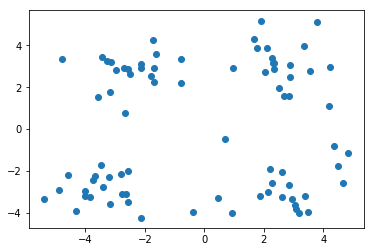

In [4]:
# 载入数据
data = np.genfromtxt("kmeans.txt", delimiter=" ")

plt.scatter(data[:,0],data[:,1])
plt.show()

In [5]:
# 计算距离
def euclDistance(vector1, vector2):
    return np.sqrt(sum((vector2 - vector1)**2))

# 初始化质心
def initCentroids(data, k):
    numSamples, dim = data.shape
    # k个质心，列出跟样本的列数一样
    centroids = np.zeros((k, dim))
    # 随机选出k个质心
    for i in range(k):
        # 随机选出一个样本的索引
        index = int(np.random.uniform(0, numSamples))
        # 作为初始化质心
        centroids[i, :] = data[index, :]
    return centroids

# 传入数据集和k的值
def kmeans(data, k):
    # 计算样本个数
    numSamples = data.shape[0]
    # 样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本跟它所属簇的误差
    clusterData = np.array(np.zeros((numSamples, 2)))
    # 决定质心是否要改变的变量
    clusterChanged = True
    
    # 初始化质心
    centroids = initCentroids(data, k)
    
    while clusterChanged:
        clusterChanged = False
        # 循环每一个样本
        for i in range(numSamples):
            # 最小距离
            minDist = 100000.0
            # 定义样本所属的簇
            minIndex = 0
            # 循环每一个质心和样本，计算距离
            for j in range(k):
                # 循环每一个质心和样本
                distance = euclDistance(centroids[j, :], data[i, :])
                # 如果计算的距离小于最小距离，则更新最小距离
                if distance < minDist:
                    minDist = distance
                    # 更新最小距离
                    clusterData[i, 1] = minDist
                    # 更新样本所属的簇
                    minIndex = j
                
            # 如果样本的所属的簇发生了变化
            if clusterData[i, 0] != minIndex:
                # 质心要重新计算
                clusterChanged = True
                # 更新样本的簇
                clusterData[i, 0] = minIndex
            
        # 更新质心
        for j in range(k):
            # 获取第j个簇所有的样本所在的索引
            cluster_index = np.nonzero(clusterData[:, 0] == j)
            # 第j个簇所有的样本点
            pointsInCluster = data[cluster_index]
            # 计算质心
            centroids[j, :] = np.mean(pointsInCluster, axis = 0)
#        showCluster(data, k, centroids, clusterData)

    return centroids, clusterData

# 显示结果
def showCluster(data, k, centroids, clusterData):
    numSamples, dim = data.shape
    if dim != 2:
        print("dimension of yoour data is not 2!")
        return 1
    
    # 用不同颜色形状来表示各个类别
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r','pr']
    if k > len(mark):
        print("Your k is too large！")
        return 1
    
    # 画样本点
    for i in range(numSamples):
        markIndex = int(clusterData[i, 0])
        plt.plot(data[i, 0], data[i, 1], mark[markIndex])
        
    # 用不同颜色形状来表示各个形状
    mark = ['*r', '*b', '*g', '*k', '^b', 'sb', 'db', '<b', 'pb']
    # 画质心点
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)
        
    plt.show()

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


cluster complete!


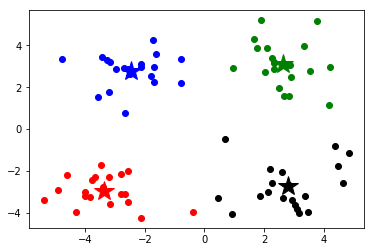

In [9]:
# 设置k值
k = 4

min_loss = 10000000
min_loss_centroids = np.array([])
min_loss_clusterData = np.array([])

for i in range(50):
    # centrtroids 簇的中心点
    # cluster Data样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本跟它所属簇的误差
    centroids, clusterData = kmeans(data, k)
    loss = sum(clusterData[:,1])/data.shape[0]
    if loss < min_loss:
        min_loss = loss
        min_loss_centroids = centroids
        min_loss_clusterData = clusterData
print('cluster complete!')
centrodis = min_loss_centroids
cluster = min_loss_clusterData

# 显示结果
showCluster(data, k, centroids, clusterData)

In [17]:
# 做预测
x_test = [0,1]
np.tile(x_test,(k,1))

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [18]:
# 误差
np.tile(x_test,(k,1))-centroids

array([[ 3.38237045,  3.9473363 ],
       [ 2.46154315, -1.78737555],
       [-2.6265299 , -2.10868015],
       [-2.80293085,  3.7315146 ]])

In [19]:
# 误差平方
(np.tile(x_test,(k,1))-centroids)**2

array([[11.44042986, 15.58146387],
       [ 6.05919468,  3.19471136],
       [ 6.89865932,  4.44653198],
       [ 7.85642135, 13.92420121]])

In [20]:
# 误差平方和
((np.tile(x_test,(k,1))-centroids)**2).sum(axis=1)

array([27.02189373,  9.25390604, 11.34519129, 21.78062256])

In [21]:
# 最小值所在的索引号
np.argmin(((np.tile(x_test,(k,1))-centroids)**2).sum(axis=1))

1

In [22]:
def predict(datas):
    return np.array([np.argmin(((np.tile(data,(k,1))-centroids)**2).sum(axis=1)) for data in datas])

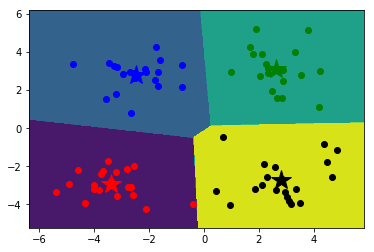

In [23]:
# 获取数据集所在的范围
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)

# 等高线图
cs = plt.contourf(xx, yy, z)
# 显示结果
showCluster(data, k, centroids, clusterData)